# CodeForMiami
## Monday, June 29, 2015
### LAB Miami

The goals for this hack are:
- Explore open data
- Fetch open data
- Data munge/clean
- Make a plot
- (optionally) Make a blog post

First, we will import all the modules we will need.  
I especially like **`pandas` and `seaborn`.**

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt # side-stepping mpl backend

import warnings
warnings.filterwarnings("ignore") #YOLO

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)


###Fetch open data

Next, we need to import the data.  I accessed the 311 open data at [Miami-Dade County’s Open Data Portal](https://opendata.miamidade.gov/).

I saved it as a `.csv` file.

In [2]:
!ls data/

311_Service_Requests_-_Miami-Dade_County.csv


In [3]:
dat = pd.read_csv('data/311_Service_Requests_-_Miami-Dade_County.csv')

It has almost 400,000 rows!

In [4]:
len(dat.City)

396077

In [5]:
dat.head()

,Ticket ID,Issue Type,Issue Description,Case Owner,Street Address,City,State / Province,Zip / Postal Code,Neighborhood / District / Ward / etc.,Created Year Month,Ticket Created Date / Time,Ticket Last Updated Date / Time,Ticket Closed Date / Time,Ticket Status,Location,Method Received,Goal Days,Actual Completed Days
0,13-10117340,POTHOLE,NaN,Public_Works_Road_And_Bridges-16-60,10300 NW 10TH AVE,Miami_Dade_County,Florida,33150,District 2,20142,02/18/2014 12:00:00 AM,02/20/2014 12:00:00 AM,02/18/2014 11:35:00 AM,CLOSED,"10300 NW 10TH AVE\nMIAMI, Florida 33150\n(25.8...",PHONE,3,0
1,13-10118035,PW OTHER,NaN,Public_Works_Waste_Management,3011 SW 84TH AVE,Miami_Dade_County,Florida,33155,District 10,20142,02/18/2014 12:00:00 AM,08/05/2014 12:00:00 AM,02/18/2014 11:34:12 AM,CLOSED,"3011 SW 84TH AVE\nMIAMI, Florida 33155\n(25.74...",PHONE,90,0
2,13-10123125,PW OTHER,NaN,Public_Works_Waste_Management,6851 NW 12TH AVE,City_of_Miami,Florida,33150,District 3,20142,02/18/2014 12:00:00 AM,03/26/2014 12:00:00 AM,02/18/2014 11:30:28 AM,CLOSED,"6851 NW 12TH AVE\nMIAMI, Florida 33150\n(25.83...",PHONE,90,0
3,13-10124050,PW OTHER,NaN,Public_Works_Waste_Management,14400 NE 16TH AVE,Miami_Dade_County,Florida,33161,District 2,20142,02/18/2014 12:00:00 AM,06/17/2014 12:00:00 AM,02/18/2014 11:28:56 AM,CLOSED,"14400 NE 16TH AVE\nMIAMI, Florida 33161\n(25.9...",PHONE,90,0
4,13-10127425,TRAFFIC SIGN STREET NAME MISSING DOWN DAMAGED,NaN,Public_Works_Traffic_Engineering-10-60,15201 SW 172ND AVE,Miami_Dade_County,Florida,33187,District 9,20142,02/20/2014 12:00:00 AM,03/05/2014 12:00:00 AM,02/20/2014 01:14:02 PM,CLOSED,"15201 SW 172ND AVE\nMIAMI, Florida 33187\n(25....",PHONE,45,0


In [6]:
dat.columns

Index([u'Ticket ID', u'Issue Type', u'Issue Description', u'Case Owner', u'Street Address', u'City', u'State / Province', u'Zip / Postal Code', u'Neighborhood / District / Ward / etc.', u'Created Year Month', u'Ticket Created Date / Time', u'Ticket Last Updated Date / Time', u'Ticket Closed Date / Time', u'Ticket Status', u'Location', u'Method Received', u'Goal Days', u'Actual Completed Days'], dtype='object')

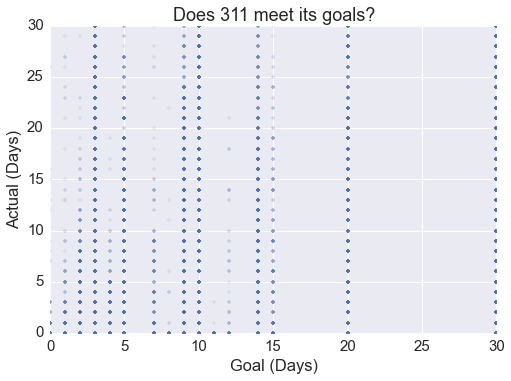

In [7]:
plt.plot(dat['Goal Days'], dat['Actual Completed Days'], '.', alpha=0.1)
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.title('Does 311 meet its goals?')
plt.xlabel('Goal (Days)')
plt.ylabel('Actual (Days)')

Yuck, that's a scatter plot.  Let's make a 2D (Hess) diagram.

In [8]:
H, xbins, ybins = np.histogram2d(dat['Goal Days'], dat['Actual Completed Days'],
                                 bins=(np.linspace(-60, 60, 120),
                                       np.linspace(-60, 60, 120)))

In [9]:
sns.set_style('dark')

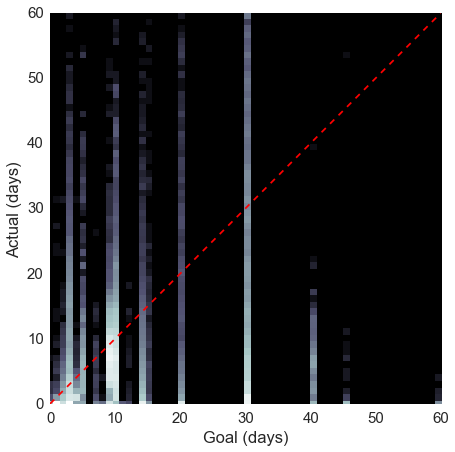

In [10]:
# Create a black and white color map where bad data (NaNs) are white
cmap = plt.cm.bone
cmap.set_bad('w', 1.)

# Use the image display function imshow() to plot the result
fig, ax = plt.subplots(figsize=(7, 7))
H[H == 0] = 1  # prevent warnings in log10
ax.imshow(np.log10(H).T, origin='lower',
          extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
          cmap=cmap, interpolation='nearest',
          aspect='auto')
ax.plot([0,60],[0, 60], 'r--')
plt.xlim(0,60)
plt.ylim(0,60)
plt.xlabel('Goal (days)')
plt.ylabel('Actual (days)')

That looks better.  The red-dashed line is the 1:1 line.  Above this line, 311 did not meet its goal to complete the task, below this line 311 completed the task faster than its goal.  It sort of looks like most 311 tasks are completed below the 1:1 line.  But let's just compute it.

In [11]:
dat.columns

Index([u'Ticket ID', u'Issue Type', u'Issue Description', u'Case Owner', u'Street Address', u'City', u'State / Province', u'Zip / Postal Code', u'Neighborhood / District / Ward / etc.', u'Created Year Month', u'Ticket Created Date / Time', u'Ticket Last Updated Date / Time', u'Ticket Closed Date / Time', u'Ticket Status', u'Location', u'Method Received', u'Goal Days', u'Actual Completed Days'], dtype='object')

In [12]:
diff = dat['Actual Completed Days'] - dat['Goal Days']

In [13]:
good_diff = diff[diff == diff] 

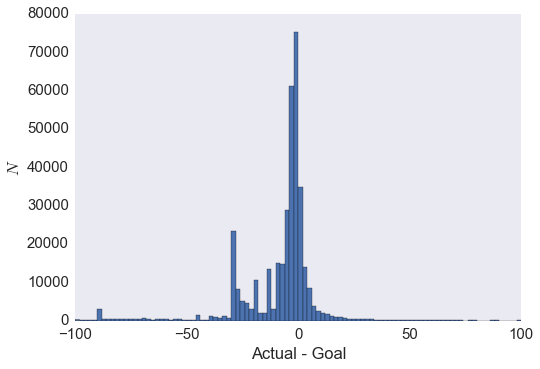

In [18]:
plt.hist(good_diff, range=(-100, 100), bins=100)
plt.yscale('linear')
plt.xlabel('Actual - Goal')
plt.ylabel('$N$')

In [15]:
n_good = np.sum(good_diff <= 0)
n_bad = np.sum(good_diff > 0)
n_tot = len(good_diff)

In [16]:
n_good, n_bad, n_tot

(324364, 60136, 384500)

In [17]:
print "Miami 311 meets their goal {:.1f}% of the time.".format(n_good*100.0/n_tot)

Miami 311 meets their goal 84.4% of the time.


**Miami 311 gets a B.**

The end!